# Introduction To Evaluating Binary Classifiers

In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. Here are a few examples of classification problems:

Problem	| Sample Features |	Type |	Categories | Numerical Categories
--- | --- | ---  | ---  | ---
Should we accept this student based on their graduate school application? | ollege GPA, SAT Score, Quality of Recommendations |	Binary |	Don't Accept, Accept |	0, 1
What is the most likely blood type of 2 parent's offspring?	| Parent 1's blood type, Parent 2's blood type.	| Multi-class |	A, B, AB, O	 | 1, 2, 3, 4



We'll focus on binary classification for now, where the only 2 options for values are:

0 for the False condition,
1 for the True condition.

Before we dive into classification, let's understand the data we'll be working with.

## 1. Introduction To The Data

We will begin by examining some numerical and graphical summaries of the **Smarket** data, which is part of the ISLR library for our textbook. 

This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, *Lag1* through *Lag5*. We have also recorded *Volume* (the number of shares traded on the previous day, in billions), *Today* (the percentage return on the date in question) and *Direction* (whether the market was Up or Down on this date). 

In this example, we will fit a logistic regression model in order to predict *Direction* using *Lag1* through *Lag5* and *Volume*. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Smarket.csv into a Dataframe named stocks
stocks = pd.read_csv('Data/Smarket.csv') 

# print the information of the dataset
print(stocks.info())

# print # of rows, # of columns
print(stocks.shape)

# print the first five rows
stocks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
Unnamed: 0    1250 non-null int64
Year          1250 non-null int64
Lag1          1250 non-null float64
Lag2          1250 non-null float64
Lag3          1250 non-null float64
Lag4          1250 non-null float64
Lag5          1250 non-null float64
Volume        1250 non-null float64
Today         1250 non-null float64
Direction     1250 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 97.7+ KB
None
(1250, 10)


,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [2]:
# convert Direction to dummy variables

stocks_up = pd.get_dummies(stocks['Direction'])

# Join the dummy variables to the main dataframe
stocks_new = pd.concat([stocks, stocks_up], axis=1)
stocks_new.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Down,Up
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0,1


## 2. Logistic Regression


In the previous scatter plot, you'll notice that the *Lag1* column and the *Up* column do not have a clear linear relationship.

Recall that the Up column only contains the values 0 and 1 and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical** values. Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.


In this unit, we'll focus on a classification technique called **logistic regression**. While a linear regression model outputs a real number as the label, a logistic regression model outputs a *probability* value. In binary classification, if the probability value is larger than a certain **threshold probability**, we assign the label for that row to 1 or 0 otherwise.



This threshold probability is something we select, and we'll learn about how to select a good threshold probability in later missions. For now, let's dive more into how logistic regression works.



In linear regression, we used the linear function *y = mx + b* to represent the relationship between the independent variables and the dependent variable. In logistic regression, we use the logit function, which is a version of the linear function that is adapted for classification.



Let's explore some of the logit function's properties to better understand why it's useful for classification tasks. Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. Note that the model can't output a negative value or it would violate this criteria.


## 3. Training A Logistic Regression Model

Let's now move onto training the logistic regression model using our dataset. 

 We'll be using the scikit-learn library to fit a model between the lag variables and the Up columns. Training a logistic regression model in scikit-learn is similar to training a linear regression model, with the key difference that we use the LogisticRegression class instead of the LinearRegression class. Scikit-learn was designed to make it easy to swap out models by keeping the syntax and notation as consistent as possible across it's different classes.

In [3]:
# define the x columns and y variable

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
x_columns = ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]

# fit a logistic model
logistic_model.fit(stocks_new[x_columns], stocks_new["Up"])
logistic_model.coef_ 

array([[-0.07279035, -0.04229102,  0.010958  ,  0.00921799,  0.01023031,
         0.12793931]])

In [4]:
# generate predicted probability
pred_probs = logistic_model.predict_proba(stocks_new[x_columns])

# create a new column to store the probability
stocks_new["Prediction"] = pred_probs[:,1]

In [5]:
# Use the LogisticRegression method predict to return the predicted for each label in the training set.

fitted_labels = logistic_model.predict(stocks_new[x_columns])
stocks_new["predicted_label"] = fitted_labels
stocks_new["actual_label"] = stocks_new["Up"]


### Binary Classification Outcomes

It looks like the raw accuracy is around 52.5% which is slightly better than randomly guessing the label (which would result in around a 50% accuracy). Calculating the accuracy of a model on the dataset used for training is a useful initial step just to make sure the model at least beats randomly assigning a label for each observation. However, prediction accuracy doesn't tell us much more.

The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make. In a later mission, we'll learn how to evaluate a model's effectiveness on new, unseen data. In this mission, we'll focus on the principles of evaluating binary classification models by testing our model's effectiveness on the training data.

To start, let's discuss the 4 different outcomes of a binary classification model in the following **confusion matrix**:

 | Predicted |  Predicted
--- | ---  | --- 
**Observation** | Down (0) | Up (1)
Down (0) | True Negative (TN) | False Positive (FP)
Up (1) | False Negative (FN) | True Positive (TP)

By segmenting a model's predictions into these different outcome categories, we can start to think about other measures of effectiveness that give us more granularity than simple accuracy.

We can define these outcomes as:

**True Postive** - The model correctly predicted that the market went up.

Said another way, the model predicted that the label would be Positive, and that ended up being True.
For this dataset, a true positive is whenever predicted_label is 1 and actual_label is 1.


**True Negative** - The model correctly predicted that the market went down.

Said another way, the model predicted that the label would be Negative, and that ended up being True.
For this dataset, a true negative is whenever predicted_label is 0 and actual_label is 0.


**False Positive** - The model incorrectly predicted that the market went up even though the market went down.

Said another way, the model predicted that the label would be Positive, but that was False (the actual label was True).
For this dataset, a false positive is whenever predicted_label is 1 but the actual_label is 0.

**False Negative** - The model incorrectly predicted that the market went down even though the market went up.

Said another way, the model predicted that the would be Negative, but that was False (the actual value was True).
For this dataset, a false negative is whenever predicted_label is 0 but the actual_label is 1.


Let's calculate the number of observations that fall into some of these outcome categories.

In [6]:
# compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(stocks_new["actual_label"], stocks_new["predicted_label"])


array([[143, 459],
       [135, 513]], dtype=int64)

In [7]:
tn, fp, fn, tp = confusion_matrix\
(stocks_new["actual_label"], stocks_new["predicted_label"]).ravel() 
print(tn, fp, fn, tp) 

143 459 135 513


### Accuracy

The stocks_new Dataframe now contains the predicted value for that row, in the predicted_label column, and the actual value for that row, in the Up column. This format makes it easier for us to calculate how effective the model was on the training data. The simplest way to determine the effectiveness of a classification model is prediction accuracy. Accuracy helps us answer the question:

** What fraction of the predictions were correct (actual label matched predicted label)? **

Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations:

** Accuracy = # of Correctly Predicted / # of Observations **


In logistic regression, recall that the model's output is a probability between 0 and 1. To decide whether the market was Up on that day, we set a threshold and mark those day as Up days when their computed probability exceeds that threshold. This threshold is called the ** discrimination threshold ** and scikit-learn sets it to 0.5 by default when predicting labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0.

An accuracy of 1.0 means that the model predicted 100% of days correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the days correctly. Let's calculate the accuracy for the predictions the logistic regression model made.

### Sensitivity

Let's now look at a few measures that are much more insightful than simple accuracy. Let's start with sensitivity:

** Sensitivity or True Positive Rate **  - The proportion of days that actually went up


** TPR = True Positives / (True Positives + False Negatives) ** 

Of all of the days that went up (True Positives + False Negatives), what fraction did the model correctly predict the movement (True Positives)? More generally, this measure helps us answer the question:

** How effective is this model at identifying positive outcomes? ** 

In our case, the positive outcome (label of 1) is the market went up. If the True Positive Rate is low, it means that the model isn't effective at catching positive cases. 

For certain problems, high sensitivity is incredibly important. If we're building a model to predict which patients have cancer, every patient that is missed by the model could mean a loss of life. We want a highly sensitive model that is able to "catch" all of the positive cases (in this case, the positive case is a patient with cancer).

Let's calculate the sensitivity for the model we're working with.

### Specificity

Looks like the sensitivity of the model is around 80% and about 8 of 10 up days were actually captured by our model. 

In the healthcare context, however, low sensitivity could mean a severe loss of life. If a classification model is only catching 12.7% of positive cases for an illness, then around 7 of 8 people are going undiagnosed (being classified as false negatives). Hopefully you're beginning to acquire a sense for the tradeoffs predictive models make and the importance of understanding the various measures.

Let's now learn about ** specificity** :

** Specificity or True Negative Rate**  - The proportion of applicants that were correctly rejected:

** TNR = True Negatives / (False Positives + True Negatives)** 


This helps us answer the question:

** How effective is this model at identifying negative outcomes?** 

A high specificity means that the model is really good at predicting which days went down.

Let's calculate the specificity of our model.

In [8]:
print("Accuracy = %s" %((tn+tp)/(tn+tp+fn+fp)))
print("Sensitivy = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))


Accuracy = 0.5248
Sensitivy = 0.7916666666666666
Specificity = 0.23754152823920266


## ROC Curve

We can vary the **discrimination threshold** and calculate the TPR and FPR for each value. This is called an ROC curve, which stands for reciever operator curve, and it allows us to understand a classification model's performance as the discrimination threshold is varied. To calculate the TPR and FPR values *at each discrimination threshold*, we can use the scikit-learn roc_curve function. This function will calculate the false positive rate and true positive rate for varying discrimination thresholds until both reach 0%.

This function takes 2 required parameters:

y_true: list of the true labels for the observations,
y_score: list of the model's probability scores for those observations.
As the example code in the documentation suggests, the roc_curve function returns 3 values which you can assign all at once:

fpr, tpr, thresholds = metrics.roc_curve(labels, probabilities)

You'll notice that the returned thresholds won't usually range from 0.0 to 1.0 and will instead constrains the result set to the minimum range where FPR and TPR range from 0.0 to 1.0. Once we have the FPR and TPR for each relevant threshold, we can plot the ROC curve using the Matplotlib plot function.

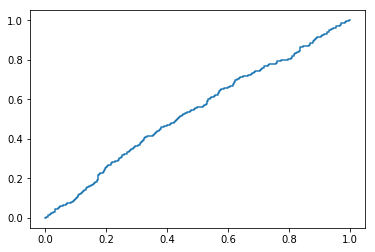

In [9]:
%matplotlib inline
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(stocks_new["actual_label"], stocks_new["Prediction"]) # pred_probs[:,1]
plt.plot(fpr, tpr)

## Area Under The Curve

When looking at an ROC curve, you want to keep an eye on how the 2 measures trade off and select an appropriate threshold based on your priorities. 

An investor benefits the most if the model does a wonderful job in recognizing ___________________ .

We can now go one step further and determine the area under the curve or AUC for short. The AUC describes the probability that the classifier will rank a random positive observation higher than a random negative observation. Since randomly guessing converges to a probability of 0.5, the higher the AUC the more accurate the model seems to be.

To calculate the AUC, we can use the scikit-learn function roc_auc_score, which takes the same parameters as the roc_curve function and returns a single float value corresponding to the AUC.



In [10]:
# Means we can just use roc_auc_curve() instead of metrics.roc_auc_curve()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(stocks_new["actual_label"], stocks_new["Prediction"])
print(auc_score)

0.5386315163446946
